# Análisis de la deforestación en Chocó, Colombia

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns
from matplotlib.lines import Line2D

### 1. Revisión general

In [2]:
df_deforestacion = pd.read_csv("AREAS_DEFORESTADAS_CHOCO_20241106.csv")
df_deforestacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7937 entries, 0 to 7936
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7937 non-null   int64  
 1   TIPO GEOMETRIA  7937 non-null   object 
 2   AÑO             7937 non-null   int64  
 3   IMAGEN          5901 non-null   object 
 4   CAUSA           7718 non-null   object 
 5   AREA_Ha         7937 non-null   float64
 6   OBSERVACION     7937 non-null   object 
 7   LATITUD         7930 non-null   object 
 8   LONGITUD        7930 non-null   object 
 9   MUNICIPIO       7937 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 620.2+ KB


In [3]:
df_deforestacion.head()

,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO
0,7463,Polygon,2020,T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.126512,Ninguna,"8° 22' 43,726"" N","77° 14' 19,019"" W",ACANDÍ
1,4659,Polygon,2019,T18PTQ_20190527T153621_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.140720,Ninguna,"8° 30' 47,551"" N","77° 19' 30,507"" W",ACANDÍ
2,7459,Polygon,2020,T18PTQ_20200112T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.141250,Ninguna,"8° 22' 30,966"" N","77° 13' 49,720"" W",ACANDÍ
3,9719,Polygon,2021,T18PTQ_20201202T153619_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.158066,Ninguna,"8° 36' 11.256"" N","77° 20' 50.757"" W",ACANDÍ
4,7464,Polygon,2020,T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.184549,Ninguna,"8° 22' 22,008"" N","77° 14' 3,921"" W",ACANDÍ


#### 1.1. Ajuste de los nombres de las columnas

In [4]:
# Poner todas las columnas en letra minuscula
df_deforestacion.columns = df_deforestacion.columns.str.lower()

In [5]:
# Eliminar los espacios en los nombres de las columnas
df_deforestacion.columns = df_deforestacion.columns.str.replace(' ', '_')

#### 1.2. Revisión individual de la información por columna

In [6]:
# El unico tipo de geometria es Polygon, por lo que no es información relevante
# No se tiene acceso a las imagenes por lo que tampoco son relevantes
# Los id tampoco presentan información relevante en este momento
df_deforestacion['tipo_geometria'].unique()

array(['Polygon'], dtype=object)

In [7]:
df_deforestacion['causa'].unique()

array(['Cultivo', 'Ganadería', 'Frontera Agropecuaria', 'Minería',
       'Crecimiento Urbano', 'Deslizamiento', 'Desconocida',
       'Obras Civiles', 'Incendio', 'Relleno Sanitario', nan, 'Derrumbe'],
      dtype=object)

In [8]:
# Las observaciones tampoco tienen información relevante
df_deforestacion['observacion'].unique()

array(['Ninguna', 'Vegetación Secundaria',
       'Para la alerta de 2016 se utilizó una imagen de 2017 porque no se alcanza a ver en una imagen de su año por nubosidad',
       'Para la alerta de 2016 se utilizó una imagen de 2017 porque no se alcanza a ver en una imagen de su año por nubosidadPara la alerta de 2016 se utilizó una imagen de 2017 porque no se alcanza a ver en una imagen de su año por nubosidad',
       'CODECHOCO', 'IDEAM',
       'T18NUM_20191228T153619_TCI_10m.jp2-T18NUM_20200630T153621_TCI_10m.jp2',
       'CODECHOOCO', 'NO SON COBERTURAS BOSCOSAS'], dtype=object)

In [9]:
df_deforestacion['municipio'].unique()

array(['ACANDÍ', 'ALTO\xa0BAUDÓ', 'ATRATO', 'BAGADÓ', 'BAHIA SOLANO',
       'BAJO\xa0BAUDÓ', 'BOJAYÁ', 'CARMEN DEL DARIEN', 'CARMEN DE ATRATO',
       'CÉRTEGUI', 'CONDOTO', 'EL CANTON DEL SAN PABLO',
       'EL CARMEN DE ATRATO', 'ISTMINA', 'EL LITORAL DEL SAN JUAN',
       'JURADÓ', 'LLORÓ', 'MEDIO ATRATO', 'LITORAL DEL SAN JUAN',
       'MEDIO SAN JUAN', 'MEDIO\xa0BAUDÓ', 'NÓVITA', 'NUQUI', 'QUIBDO',
       'RÍO\xa0IRÓ', 'RÍO\xa0QUITO', 'RIOSUCIO', 'UNIÓN\xa0PANAMERICANA',
       'SAN JOSE DEL PALMAR', 'SIPÍ', 'TADÓ', 'UNGUÍA'], dtype=object)

In [10]:
# Se reemplaza el caracter '\xa0' con un espacio en blanco
df_deforestacion['municipio'] = df_deforestacion['municipio'].str.replace('\xa0', ' ', regex=True) 

In [ ]:
# Revisión de los años registrados
df_deforestacion['año'].unique()

array([2020, 2019, 2021, 2014, 2018, 2015, 2017, 2016])

### 2. Limpieza de datos

#### 2.1. Eliminación de columnas sin información relevante

In [12]:
# Se eliminan las columnas id, observacion, geometria e imagen
df_deforestacion = df_deforestacion.drop(columns=['id', 'observacion', 'tipo_geometria', 'imagen'])
df_deforestacion.head()

,año,causa,area_ha,latitud,longitud,municipio
0,2020,Cultivo,0.126512,"8° 22' 43,726"" N","77° 14' 19,019"" W",ACANDÍ
1,2019,Cultivo,0.140720,"8° 30' 47,551"" N","77° 19' 30,507"" W",ACANDÍ
2,2020,Cultivo,0.141250,"8° 22' 30,966"" N","77° 13' 49,720"" W",ACANDÍ
3,2021,Cultivo,0.158066,"8° 36' 11.256"" N","77° 20' 50.757"" W",ACANDÍ
4,2020,Cultivo,0.184549,"8° 22' 22,008"" N","77° 14' 3,921"" W",ACANDÍ


#### 2.2. Análisis de datos nulos

In [13]:
# Se buscan datos ausentes encontrando que causa tiene 219 datos ausentes
df_deforestacion.isna().sum()

año            0
causa        219
area_ha        0
latitud        7
longitud       7
municipio      0
dtype: int64

In [14]:
# Se visualizan algunas de las filas con datos ausentes
df_deforestacion[df_deforestacion['causa'].isna()]

,año,causa,area_ha,latitud,longitud,municipio
5020,2021,NaN,0.419032,"7° 31' 47,118"" N","77° 16' 40,897"" W",RIOSUCIO
5033,2021,NaN,0.434291,"7° 26' 15,643"" N","77° 19' 40,982"" W",RIOSUCIO
5054,2021,NaN,0.480997,"7° 26' 6,780"" N","77° 20' 8,957"" W",RIOSUCIO
5086,2021,NaN,0.528174,"7° 40' 51,532"" N","77° 16' 49,533"" W",RIOSUCIO
5089,2021,NaN,0.530088,"7° 41' 27,380"" N","77° 21' 33,044"" W",RIOSUCIO
...,...,...,...,...,...,...
7711,2021,NaN,4.556517,"8° 0' 43,658"" N","77° 9' 34,087"" W",UNGUÍA
7719,2021,NaN,5.082797,"8° 2' 35,832"" N","77° 8' 26,389"" W",UNGUÍA
7744,2021,NaN,8.062674,"8° 4' 57,171"" N","77° 6' 22,890"" W",UNGUÍA
7769,2021,NaN,17.984094,"7° 57' 18,568"" N","77° 8' 19,153"" W",UNGUÍA


In [15]:
# Los datos ausentes en latitud y longitud se encuentran en las mismas filas
df_deforestacion[df_deforestacion['latitud'].isna()]

,año,causa,area_ha,latitud,longitud,municipio
1546,2021,Cultivo,0.199595,NaN,NaN,CARMEN DEL DARIEN
1573,2021,Cultivo,0.753289,NaN,NaN,CARMEN DEL DARIEN
1576,2021,Cultivo,0.785328,NaN,NaN,CARMEN DEL DARIEN
1577,2021,Cultivo,0.800882,NaN,NaN,CARMEN DEL DARIEN
1623,2021,Cultivo,1.286327,NaN,NaN,CARMEN DEL DARIEN
1657,2021,Cultivo,1.595656,NaN,NaN,CARMEN DEL DARIEN
1700,2021,Cultivo,2.183718,NaN,NaN,CARMEN DEL DARIEN


In [16]:
df_deforestacion.query('municipio == "CARMEN DEL DARIEN"')['area_ha'].describe()

count    364.000000
mean       4.866386
std        8.737426
min        0.171176
25%        1.391289
50%        2.549314
75%        4.769666
max      109.022395
Name: area_ha, dtype: float64

In [ ]:
# Los datos de latitud y longitud ausentes se eliminan pues el municipio de Carmen del Darien cuenta con 364 datos en total y 
# los datos ausentes representan solo el 1,9% de estos, por lo cual no se consideran significativos.
df_deforestacion = df_deforestacion.dropna(subset='latitud')

In [ ]:
# Los datos de causas desconocidas NaN se reemplazan por una categoria 'desconocido', ya que puede ser importante reflejar esos datos
df_deforestacion['causa'] = df_deforestacion['causa'].fillna('Desconocida')

#### 2.2. Análisis de datos duplicados

In [20]:
df_deforestacion.duplicated().sum()

np.int64(1)

In [21]:
df_deforestacion[df_deforestacion.duplicated()]

,año,causa,area_ha,latitud,longitud,municipio
7204,2021,Cultivo,0.404516,"4° 36' 24.946"" N","76° 23' 40.827"" W",SIPÍ


In [22]:
# Se encuentra 1 duplicado total
df_deforestacion.query('municipio == "SIPÍ" & area_ha == 0.404516')

,año,causa,area_ha,latitud,longitud,municipio
7203,2021,Cultivo,0.404516,"4° 36' 24.946"" N","76° 23' 40.827"" W",SIPÍ
7204,2021,Cultivo,0.404516,"4° 36' 24.946"" N","76° 23' 40.827"" W",SIPÍ


In [23]:
# Se decide eliminar el duplicado total
df_deforestacion = df_deforestacion.drop_duplicates()

In [24]:
df_deforestacion[df_deforestacion[['area_ha','causa','latitud', 'longitud']].duplicated()]

,año,causa,area_ha,latitud,longitud,municipio
889,2014,Minería,2.684787,"5° 23' 28,941"" N","76° 20' 12,377"" W",BAGADÓ
3681,2014,Minería,2.231747,"5° 5' 18,051"" N","76° 41' 21,587"" W",MEDIO SAN JUAN
3706,2014,Minería,7.097068,"5° 5' 29,287"" N","76° 42' 8,391"" W",MEDIO SAN JUAN
4119,2014,Minería,5.465737,"4° 53' 20,642"" N","76° 37' 39,319"" W",NÓVITA
4440,2014,Minería,4.358488,"5° 44' 23,138"" N","76° 35' 49,239"" W",QUIBDO
4471,2014,Minería,9.479921,"5° 44' 34,212"" N","76° 35' 9,780"" W",QUIBDO
4475,2014,Minería,9.799452,"5° 44' 40,399"" N","76° 35' 29,969"" W",QUIBDO
4733,2014,Minería,2.090344,"5° 37' 11,389"" N","76° 43' 45,604"" W",RÍO QUITO
4772,2014,Minería,3.234102,"5° 36' 31,783"" N","76° 44' 34,792"" W",RÍO QUITO
7919,2014,Minería,15.609533,"5° 20' 9,094"" N","76° 38' 38,503"" W",UNIÓN PANAMERICANA


In [25]:
df_deforestacion.query('municipio == "BAGADÓ" & area_ha == 2.684787')

,año,causa,area_ha,latitud,longitud,municipio
888,2015,Minería,2.684787,"5° 23' 28,941"" N","76° 20' 12,377"" W",BAGADÓ
889,2014,Minería,2.684787,"5° 23' 28,941"" N","76° 20' 12,377"" W",BAGADÓ


In [26]:
df_deforestacion.query('municipio == "QUIBDO" & area_ha == 9.479921')

,año,causa,area_ha,latitud,longitud,municipio
4470,2015,Minería,9.479921,"5° 44' 34,212"" N","76° 35' 9,780"" W",QUIBDO
4471,2014,Minería,9.479921,"5° 44' 34,212"" N","76° 35' 9,780"" W",QUIBDO


In [27]:
#Se considera que los duplicados de las columnas son el mismo dato pero de diferente año puesto que presentan la misma información de las
#columnas señaladas
df_deforestacion = df_deforestacion.drop_duplicates(subset=['area_ha','causa','latitud', 'longitud'])

### 3. Enriquecimiento de datos

#### 3.1. Conversión de latitud y longitud

In [ ]:
# Función para cambiar las coordenadas a valores decimales
def coordenadas_decimales(value):
    # Cambia los simbolos ° ' " a espacios y la , a punto para decimales
    decimal = value.translate(str.maketrans({'°': '', '\'': '', ',': '.', '"': ''}))
    # Cambia el string y lo separa en una lista de 3 posiciones 
    decimal = decimal.split(' ')
    # Genera el numero decimal
    numero = float(decimal[0]) + float(decimal[1])/60 + float(decimal[2])/3600
    # Genera el signo basado en la coordenada cardinal N, E son + y S, W negativos
    if decimal[3] == 'N' or decimal[3] == 'E':
        signo = 1
    else:
        signo = -1
    return numero*signo

In [ ]:
# Creación de las columnas de latitud decimal y longitud decimal
df_deforestacion['latitud_dec'] = df_deforestacion['latitud'].apply(coordenadas_decimales)
df_deforestacion['longitud_dec'] = df_deforestacion['longitud'].apply(coordenadas_decimales)

#### 3.2. Conversión de hectareas a kilómetros

In [ ]:
# Creación de una columna de area en kilómetros cuadrados
df_deforestacion['area_km2'] = df_deforestacion['area_ha'] / 100

### 4. Exploración y análisis de datos

In [31]:
# Función para las graficas de barras horizontales posteriores
def grafica_barras_horizontal(data,xlab='',ylab='',title='',setcolor='teal',size=(10,6)):
    fig, ax = plt.subplots(figsize=size)
    ax = data.plot(kind='barh', color=setcolor)
    ax.set_title(title, pad=20)  
    ax.set_xlabel(xlab, labelpad=10)  
    ax.set_ylabel(ylab, labelpad=10)
    ax.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
    plt.tight_layout(pad=5)
    plt.show()

#### 4.1. Análisis de las causas de deforestación

In [ ]:
# Conteo de los reportes de deforestación por causa
conteo_causas = df_deforestacion.groupby('causa')['año'].count().sort_values(ascending=True)

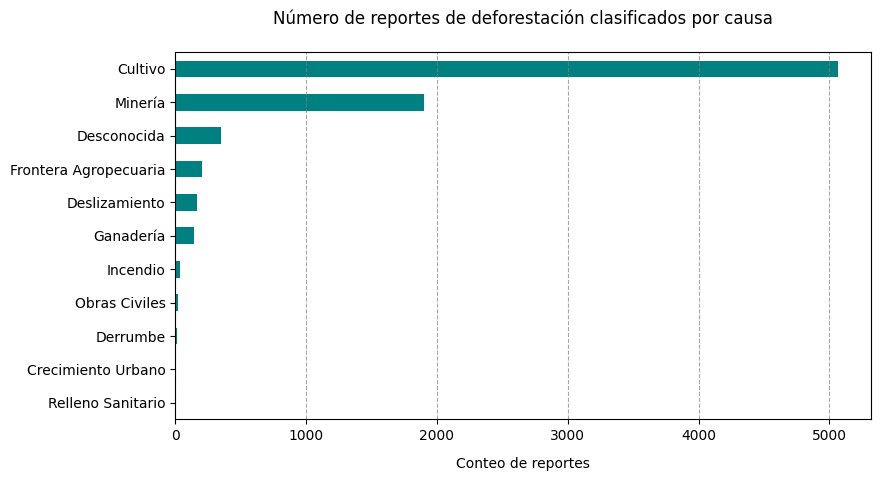

In [33]:
grafica_barras_horizontal(conteo_causas,
                          'Conteo de reportes', 
                          '', 
                          'Número de reportes de deforestación clasificados por causa')

In [ ]:
# Suma de hectáreas deforestadas por cada una de las causas agrupadas
suma_area_causa = df_deforestacion.groupby('causa')['area_ha'].sum().sort_values(ascending=True)

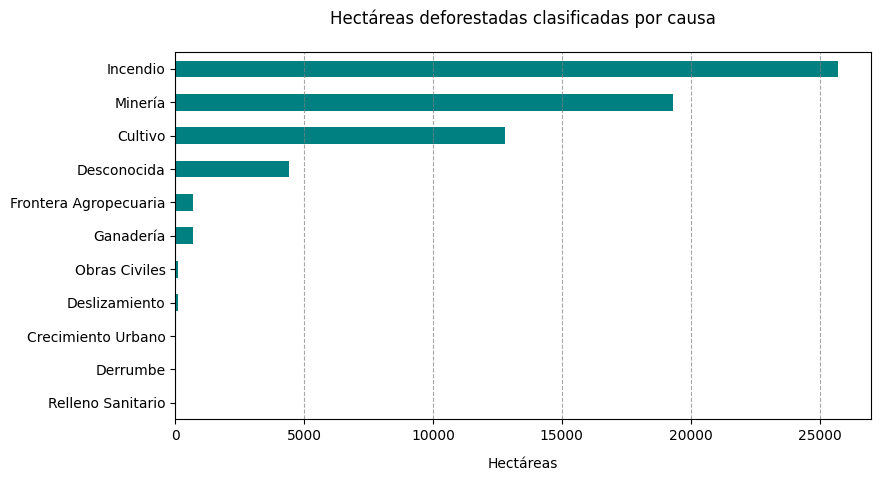

In [35]:
grafica_barras_horizontal(suma_area_causa,
                          'Hectáreas', 
                          '', 
                          'Hectáreas deforestadas clasificadas por causa',
                          )

#### 4.2. Análisis de las áreas deforestadas por año

In [ ]:
# Conteo de los reportes de deforestación por año
conteo_anual = df_deforestacion.groupby('año')['causa'].count()

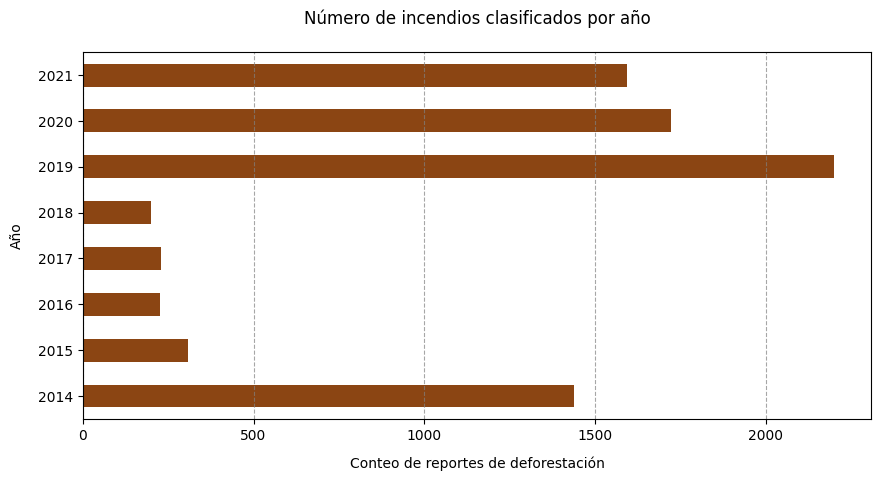

In [37]:
grafica_barras_horizontal(conteo_anual,
                          'Conteo de reportes de deforestación', 
                          'Año', 
                          'Número de incendios clasificados por año',
                          'saddlebrown')

In [56]:
# Suma de hectáreas deforestadas por cada una de las causas agrupadas
suma_area_anual = df_deforestacion.groupby('año')['area_ha'].sum()

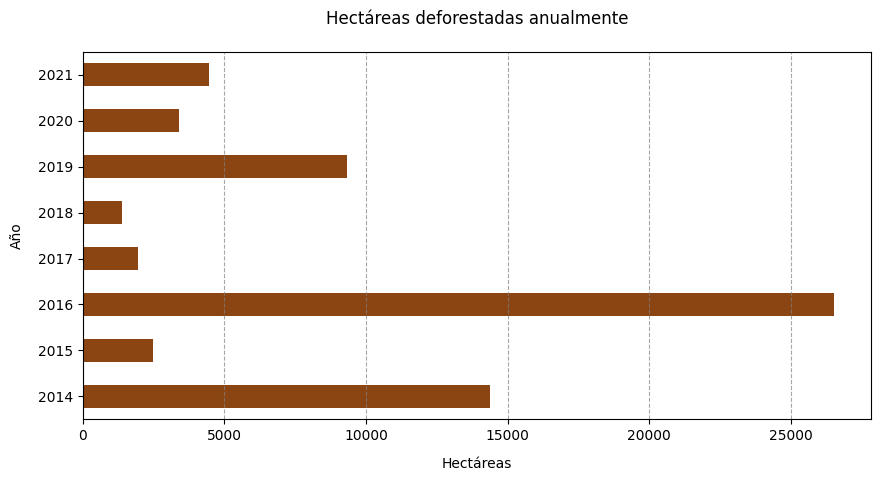

In [39]:
grafica_barras_horizontal(suma_area_anual,
                          'Hectáreas', 
                          'Año', 
                          'Hectáreas deforestadas anualmente',
                          'saddlebrown')

#### 4.3. Análisis combinado de causas por año

In [40]:
#Se filtran las principales 6 causas de deforestación
seis_principales_causas = suma_area_causa.iloc[5:].sort_values(ascending=False).reset_index()
causas_pivot = df_deforestacion.query('causa in @seis_principales_causas.causa').pivot_table(columns='causa', 
                                                                                             index='año', 
                                                                                             values='area_ha', 
                                                                                             aggfunc='sum')

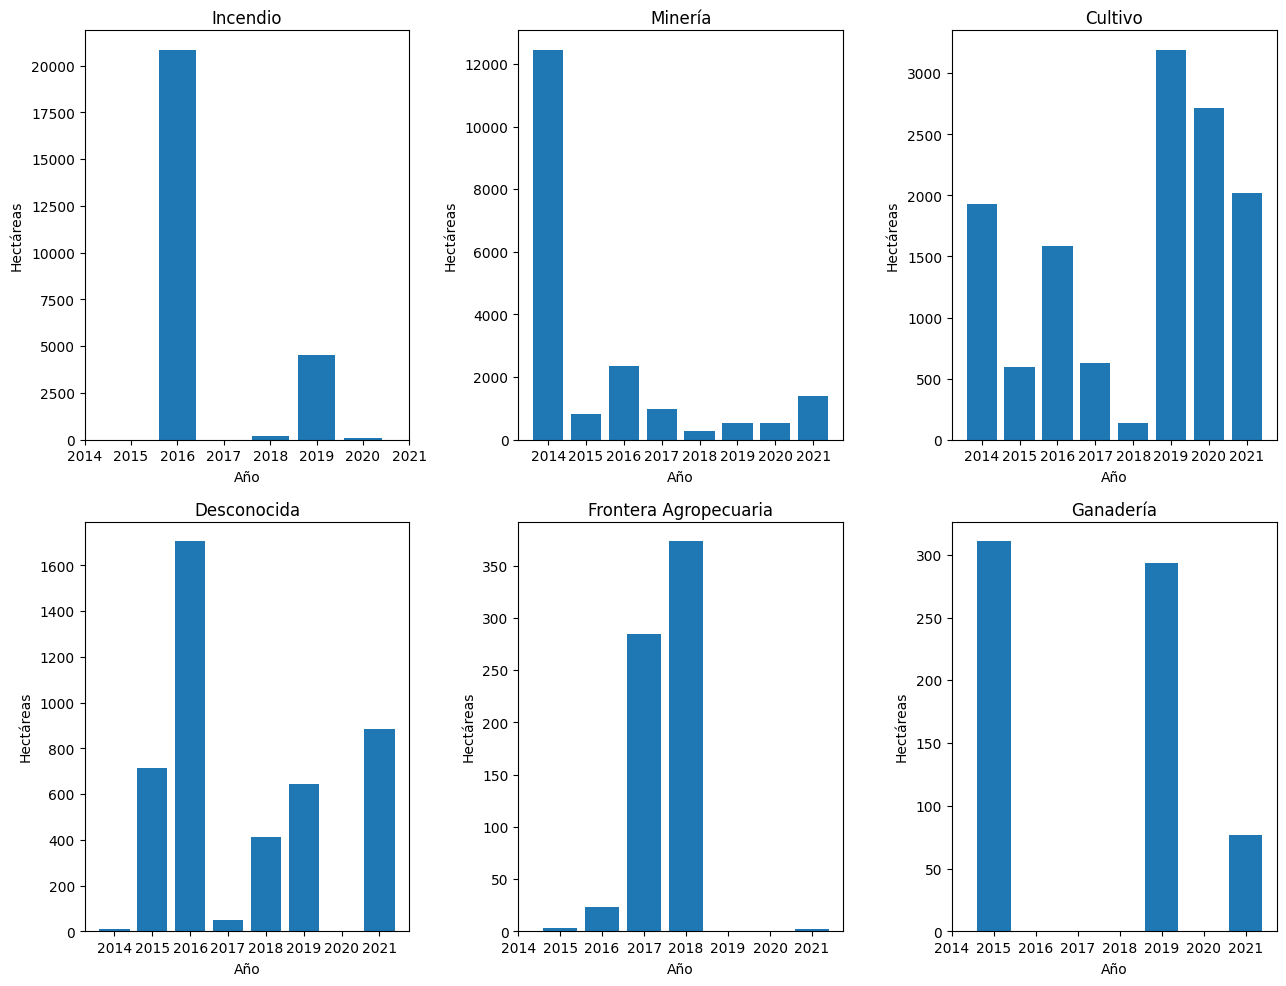

In [41]:
fig, axs = plt.subplots(2,3,figsize=(13,10))
axs = axs.flatten()
for i, causa in enumerate(seis_principales_causas['causa']):
    axs[i].bar(x=causas_pivot[causa].index, height=causas_pivot[causa].values)
    axs[i].set_title(causa, pad=5)  
    axs[i].set_xlabel('Año', labelpad=5)  
    axs[i].set_ylabel('Hectáreas', labelpad=5)
    axs[i].set_xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout(pad=1.2)
plt.show()

#### 4.4. Análisis de deforestación por municipios

In [42]:
suma_area_municipio = df_deforestacion.groupby('municipio')['area_ha'].sum().sort_values()

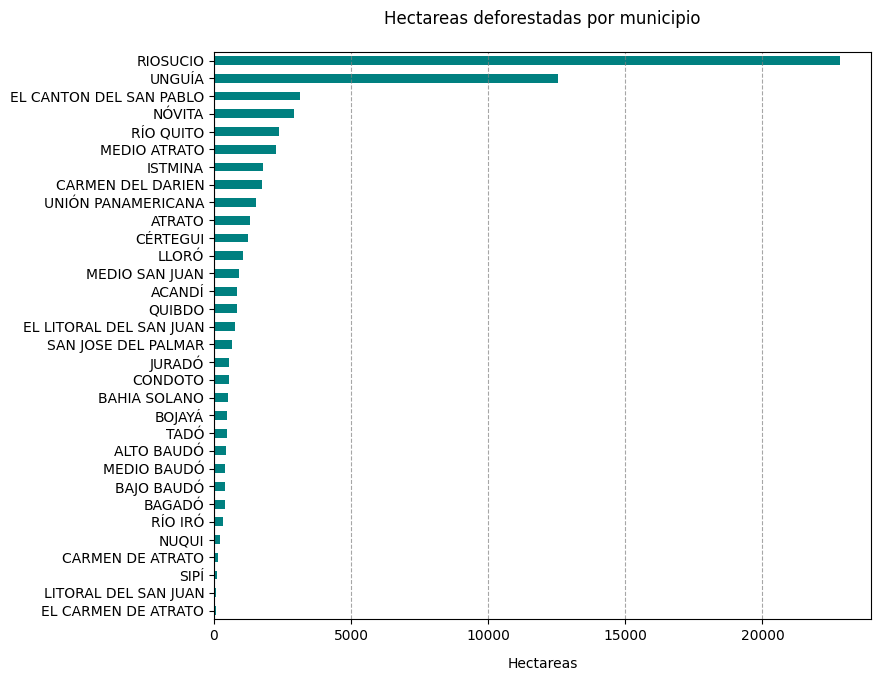

In [43]:
grafica_barras_horizontal(suma_area_municipio,'Hectareas', '', 'Hectareas deforestadas por municipio','teal',(10,8) )

In [44]:
conteo_municipal = df_deforestacion.groupby('municipio')['año'].count().sort_values()

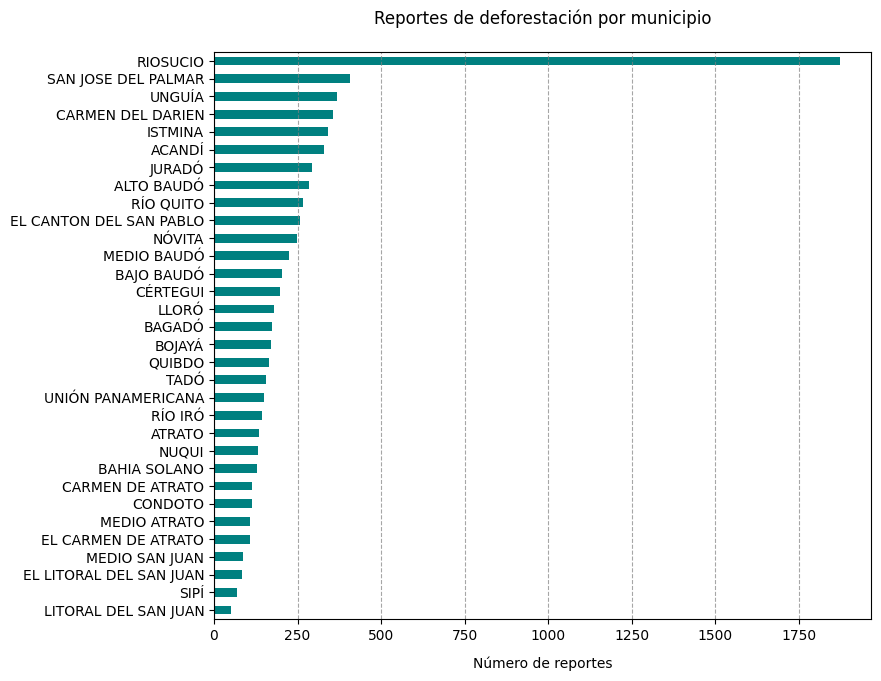

In [45]:
grafica_barras_horizontal(conteo_municipal,'Número de reportes', '', 'Reportes de deforestación por municipio','teal',(10,8) )

#### 4.5. Visualización geográfica de las zonas deforestadas

In [46]:
gdf_2 = gpd.read_file('mapa_choco.geojson')
#Circulo de referencia de 5km2
circulo = gpd.read_file('circunferencia5km2.geojson')

In [47]:
df_filtrado = df_deforestacion.sort_values(by='area_ha', ascending=False).iloc[10:15 , :]

In [48]:
causas =seis_principales_causas['causa'].unique()
colores = plt.cm.tab10(range(len(causas))) 

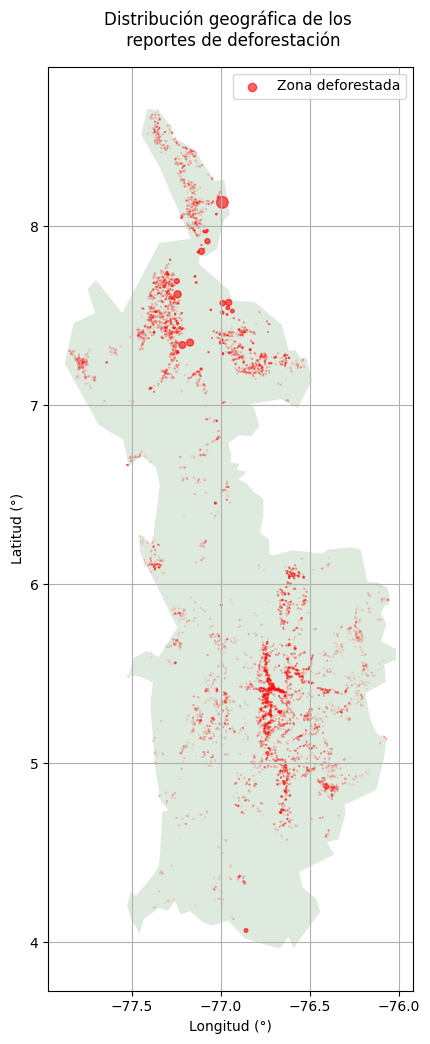

In [49]:
# Gráfica general de la distribución de los reportes de deforestación en el Chocó
fig, ax = plt.subplots(figsize=(6,12))
gdf_2.plot(ax=ax, color='darkseagreen', alpha=0.3)
plt.scatter( df_deforestacion['longitud_dec'], 
            df_deforestacion['latitud_dec'], 
            s=df_deforestacion['area_km2'],
            alpha=0.6, color='red',
            label='Zona deforestada')
ax.set_xlabel('Longitud (°)')
ax.set_ylabel('Latitud (°)')
ax.set_title('Distribución geográfica de los \n reportes de deforestación', pad=15)
ax.legend()
plt.grid(True)
#circulo.plot(ax=ax, color='white') # Esta es una referencia de tamaño de aproximadamente 5mk2
plt.show()

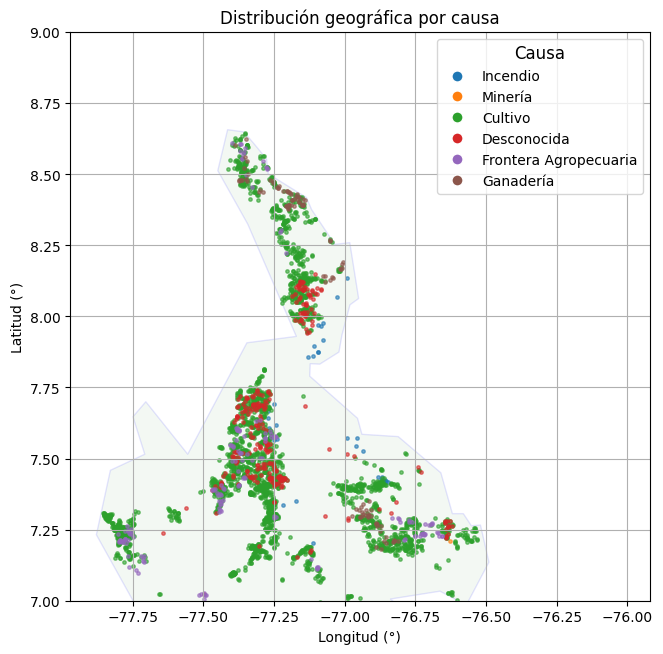

In [57]:
# Grafico seccionado por causas de deforestación
def grafico_geolocalizado_sec(lim_inf=7, lim_sup=9):
    fig, ax = plt.subplots(figsize=(7,10))
    gdf_2.plot(ax=ax, color='darkseagreen', alpha=0.1, edgecolor='blue')
    for causa, color in zip(causas, colores):
        filtro_causa = df_deforestacion[df_deforestacion['causa'] == causa]
        ax.scatter(filtro_causa['longitud_dec'], 
                filtro_causa['latitud_dec'], 
                label=causa, 
                color=color, 
                alpha=0.6,
                s=6)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=causa, 
            markerfacecolor=color, markersize=8)  # Tamaño fijo
        for causa, color in zip(causas, colores)
    ]
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')
    ax.set_title('Distribución geográfica por causa')
    ax.set_ylim(lim_inf,lim_sup)
    ax.legend(handles=legend_elements, title='Causa', fontsize=10, title_fontsize=12)
    plt.tight_layout(pad=2)
    plt.grid(True)
    plt.show()
grafico_geolocalizado_sec(7,9)

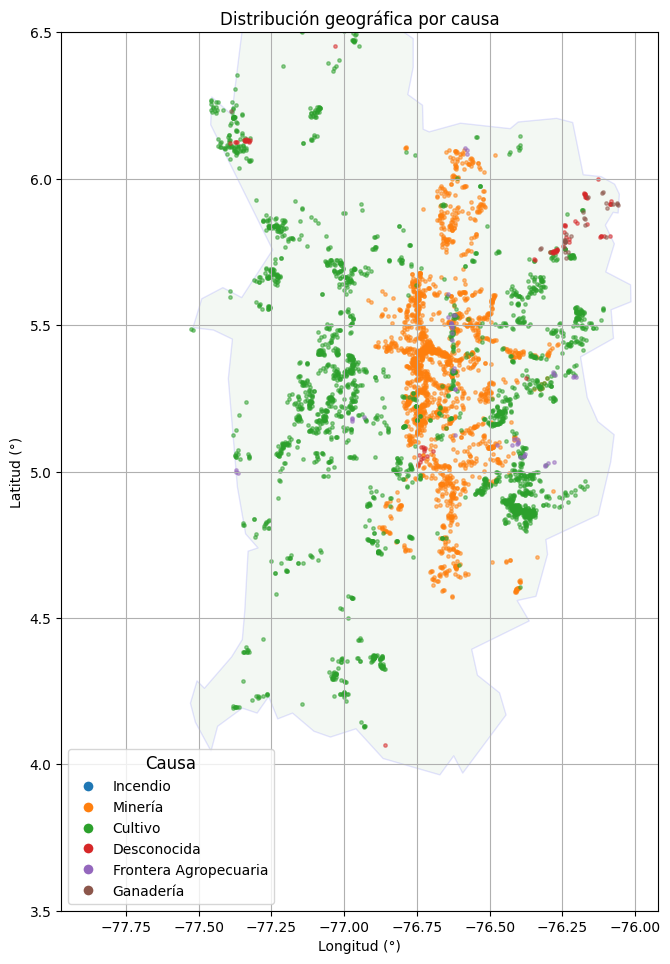

In [51]:
grafico_geolocalizado_sec(3.5,6.5)

In [52]:
# Función para graficar varios mapas dependiendo del año
def matriz_graficos_geo(data):    
    fig, axs = plt.subplots(2, 4, figsize=(12, 12))
    axs = axs.flatten()  
    years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

    for i, year in enumerate(years):
        df_filtrado_año = data.query(f'año == {year}')
        gdf_2.plot(ax=axs[i], color='darkseagreen', alpha=0.3)
        axs[i].scatter(
            df_filtrado_año['longitud_dec'],
            df_filtrado_año['latitud_dec'],
            s=1.2,
            alpha=0.6, 
            color='red', 
        )

        axs[i].set_xlabel('Longitud (°)')
        axs[i].set_ylabel('Latitud (°)')
        axs[i].set_title(f'Zonas deforestadas \n Año {year}')
        axs[i].grid(True)

    plt.tight_layout()  
    plt.show()

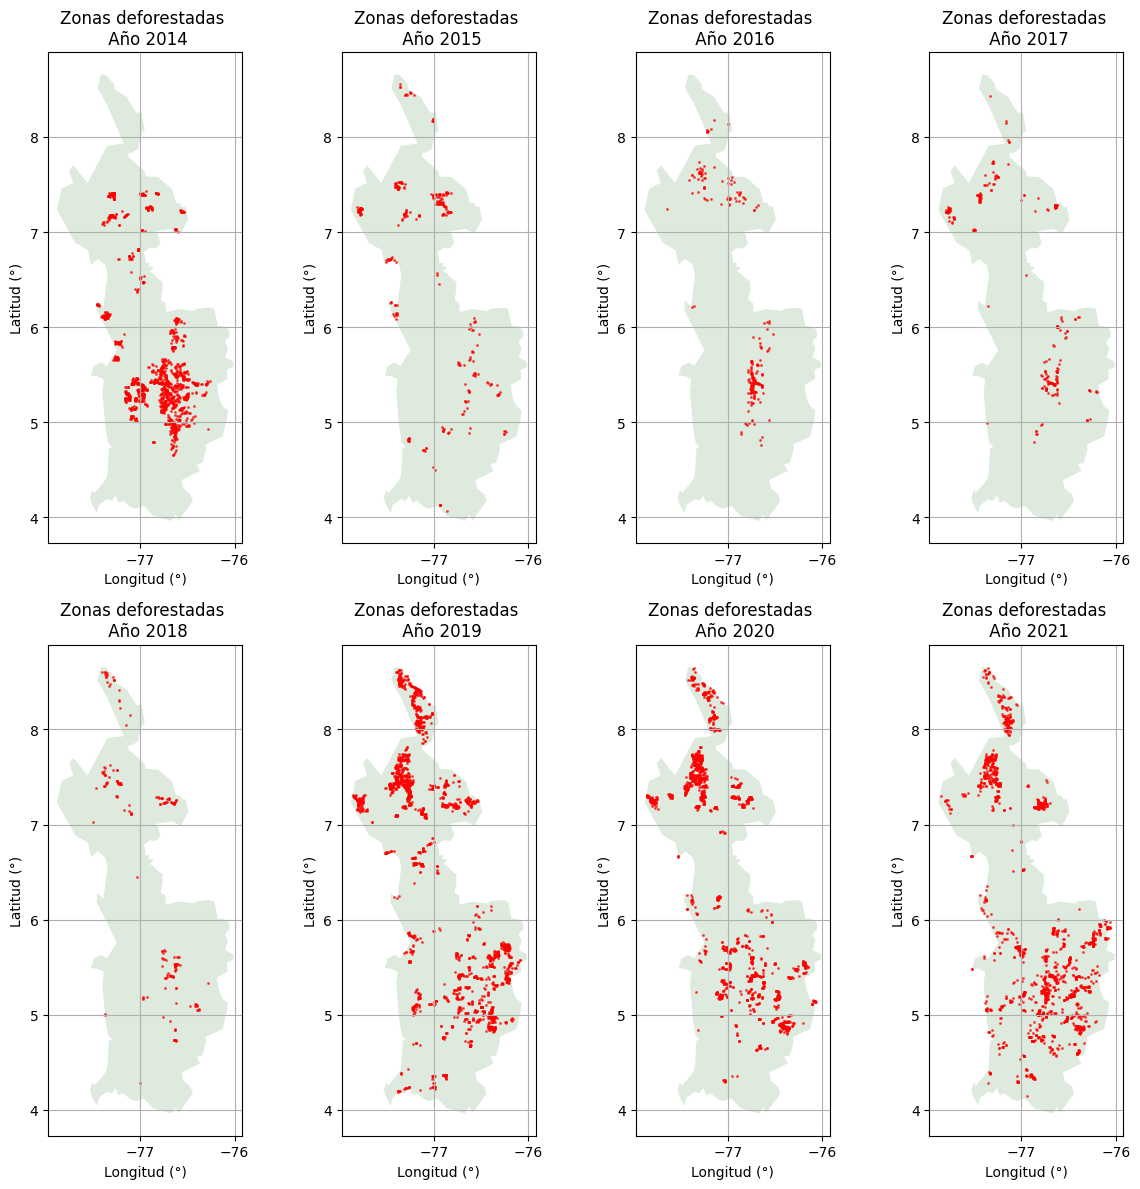

In [53]:
matriz_graficos_geo(df_deforestacion)


#### 4.6. Análisis del avance de la minería

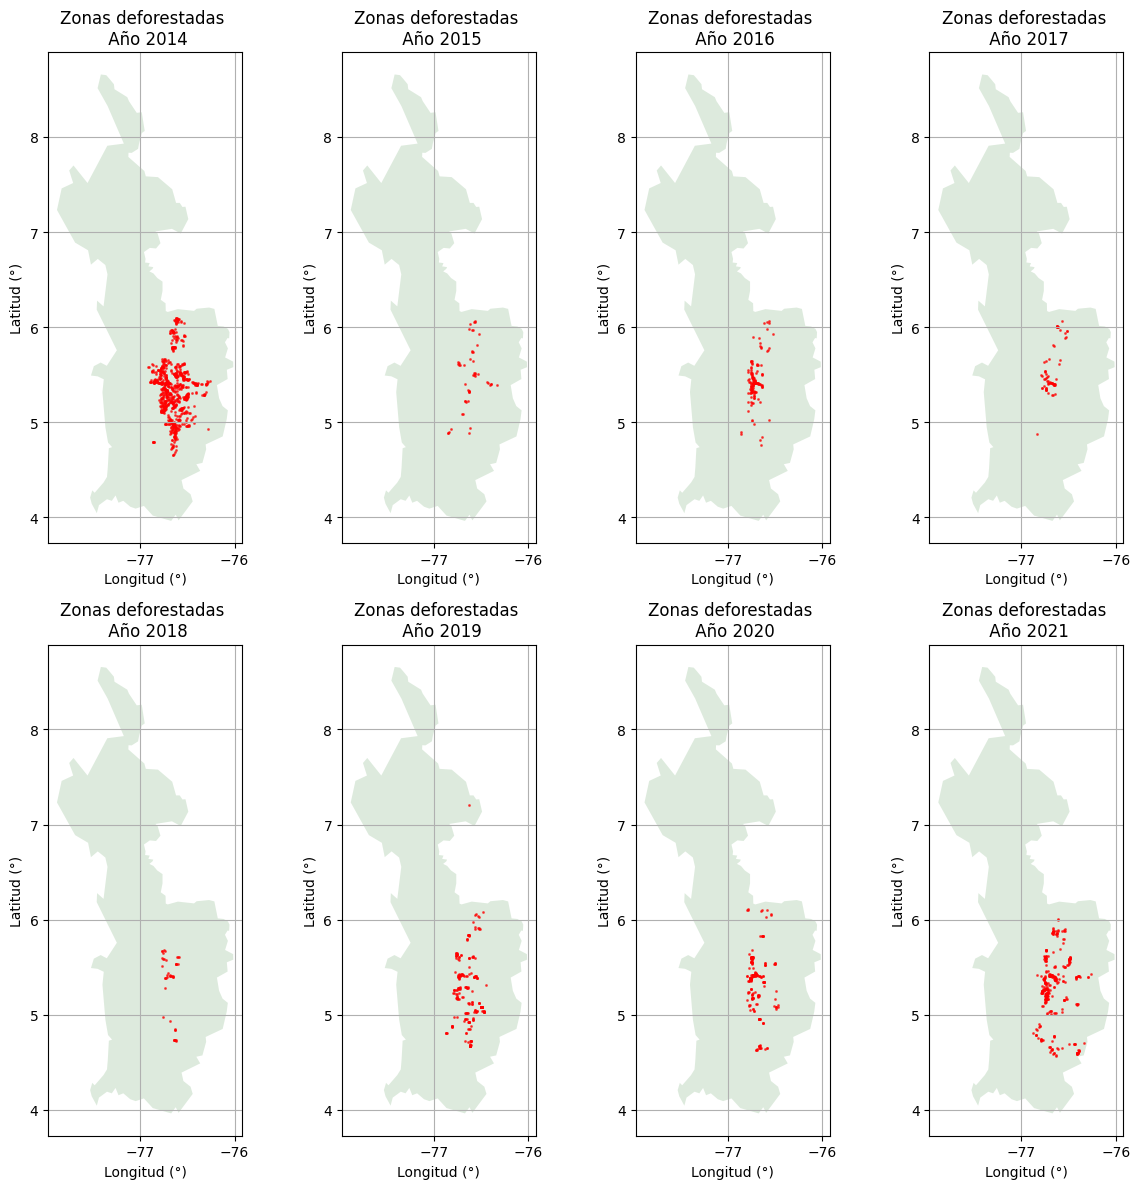

In [54]:
matriz_graficos_geo(df_deforestacion.query('causa == "Minería"'))

#### 4.6. Análisis del avance de la agricultura

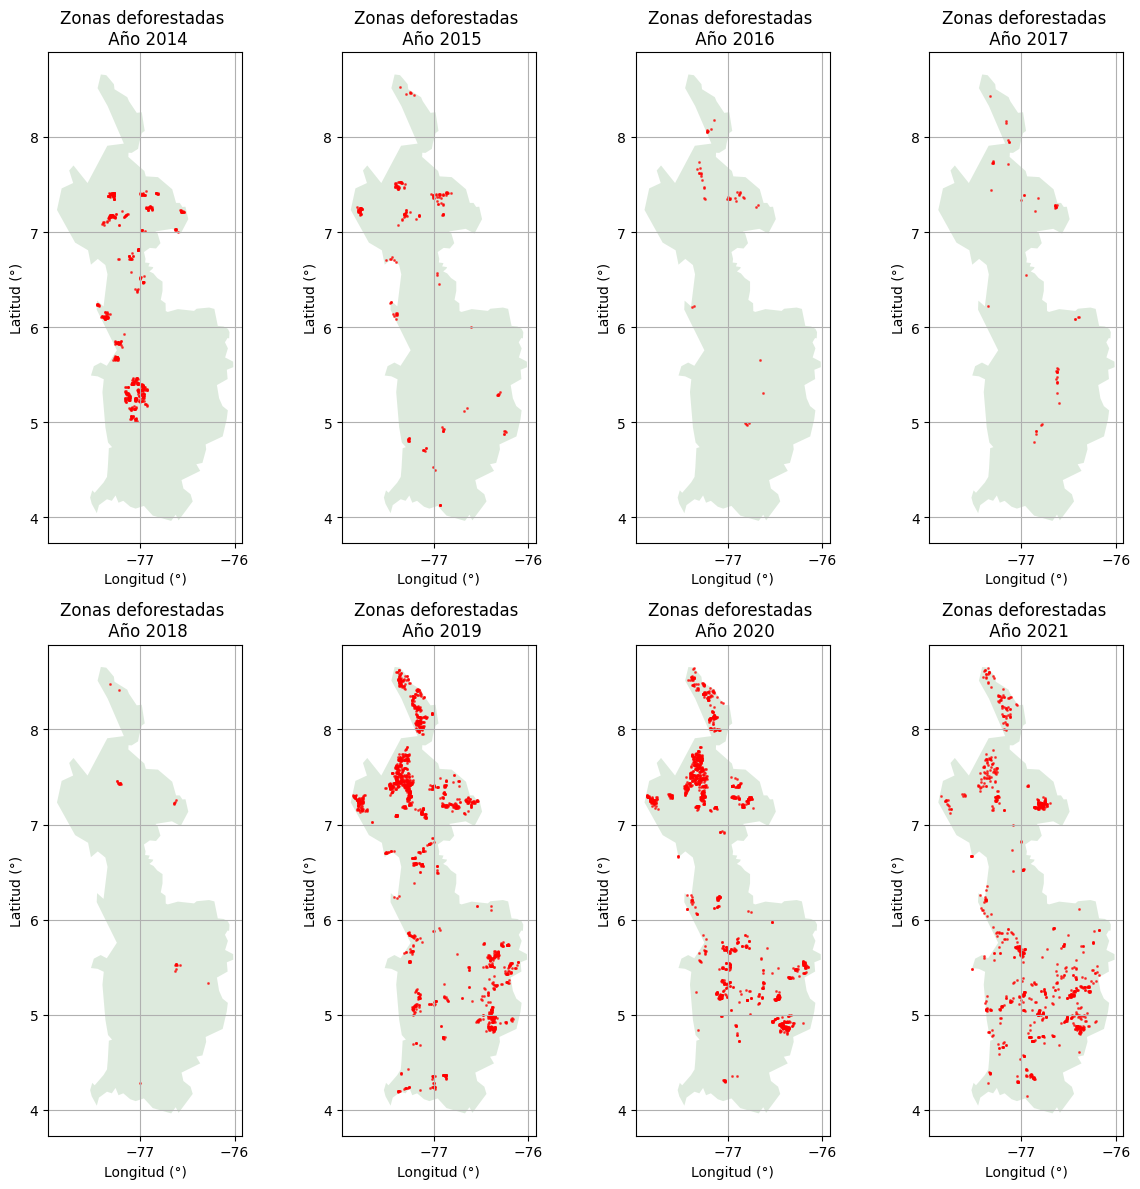

In [55]:
matriz_graficos_geo(df_deforestacion.query('causa == "Cultivo"'))